In [1]:
!pip install wordcloud
!pip install contractions

In [1]:
import pandas as pd
import re
import contractions
import wordcloud
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

STOPWORDS = stopwords.words('english')
STEMMER = PorterStemmer()
PUNCTUATIONS = r'[\!\(\)\-\[\]\{\}\;\:\"\\\,\<\>\.\/\?\@\#\$\%\^\&\*\_\~]'


In [2]:
FILE_DIR = "Data"
df = pd.read_csv(f"{FILE_DIR}/tweets_v8.csv")
data = df.loc[:, ["date","text"]]

In [3]:
print (data.shape)
print (data.head())

(80019, 2)
                        date  \
0  2021-10-06 12:05:38+00:00   
1  2021-10-06 12:05:22+00:00   
2  2021-10-06 12:05:22+00:00   
3  2021-10-06 12:05:04+00:00   
4  2021-10-06 12:05:00+00:00   

                                                text  
0  When life hits and the same time poverty strik...  
1  That marble episode of #SquidGame  ruined me. 😭😭😭  
2                                    #Squidgame time  
3  //Blood on 1st slide\nI'm joining the squidgam...  
4  The two first games, players were killed by th...  


In [4]:
def cleanText(tweet): 

    tweet_text = tweet.split()

    # remove hashtags
    tweet_no_hash = [t.lower() for t in tweet_text if not re.match(r"#.\w+", t)]
    
    # remove punctuation
    tweet_replace_sym = [re.sub(PUNCTUATIONS, "",t) for t in tweet_no_hash]

    #get words only and fix contarctions
    tweet_words = [contractions.fix(t.lower()) for t in tweet_replace_sym if re.match(r"(\w+)", t)]
    
    words = ' '.join(tweet_words)
    tweet_words =  words.split()

    #remove stop words, stem words
    tweet_no_stop = [STEMMER.stem(t) for t in tweet_words if t not in STOPWORDS]


    #remove links
    tweet_remove_link = [t for t in tweet_no_stop if not re.match(r"^http", t)]
    
    #remove from stop words 
    
    return ' '.join(tweet_remove_link)
    
def getHashtags(tweet): 
    tweet_text = tweet.split()
    hashtags = [t.lower() for t in tweet_text if re.match(r"#.\w+", t)]
    tweet_replace_sym = [re.sub(PUNCTUATIONS, "",t) for t in hashtags]
    return ' '.join(hashtags)

print (cleanText(data.text[3]))
print (getHashtags(data.text[3]))


blood 1st slide join squidgam thing alreadi dead sugar honeycomb ofc
#squidgame…


In [5]:
data["text_clean"] = data.text.apply(lambda x: cleanText(x))
data["hashtags"] = data.text.apply(lambda x: getHashtags(x))

In [6]:
fdist = nltk.FreqDist()
for sentence in data.text_clean:
    for word in nltk.tokenize.word_tokenize(sentence):
        fdist[word] += 1

fdist2 = nltk.FreqDist()
for sentence in data.hashtags:
    for word in nltk.tokenize.word_tokenize(sentence):
        fdist2[word] += 1

In [7]:
print (fdist.most_common(10))
print (fdist2.most_common(10))

[('game', 16118), ('squid', 11887), ('watch', 9452), ('episod', 4961), ('like', 4313), ('netflix', 3987), ('project', 3973), ('show', 3569), ('go', 3351), ('one', 3280)]
[('#', 131817), ('squidgame', 61753), ('netflix', 2846), ('squidgamenetflix', 2526), ('.', 1867), ('squidgames', 1527), (',', 1419), ('squidgamefanart', 1174), ('squidgame…', 1085), ('nft', 994)]


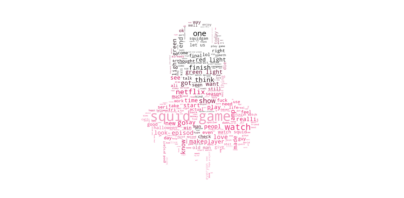

In [8]:

import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

mask = np.array(Image.open("img/squid_mask.png"))

image_colors = ImageColorGenerator(mask)

wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, stopwords=STOPWORDS, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(' '.join(data.text_clean))

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")


plt.savefig("img/squid_wc.png", format="png")

plt.show()




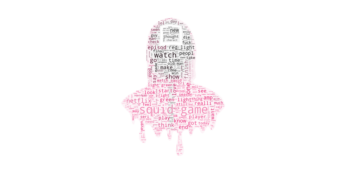

In [9]:
# Generate a word cloud image
IMAGE_DIR = "./img"

from PIL import Image
stopwords = set(STOPWORDS)

mask = np.array(Image.open(f"{IMAGE_DIR}/squid_mask.png"))

image_colors = ImageColorGenerator(mask)
wordcloud = WordCloud(width = 3000, height = 2000, stopwords=STOPWORDS, background_color="white", max_words=1000, mask=mask).generate(' '.join(data.text_clean))

# create word cloud image
plt.figure()
plt.axis("off")
im2 = plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
im1 = plt.imshow(mask, alpha = 0.05)

# store to file
plt.savefig(f"{IMAGE_DIR}/squid_wc.png", dpi=300)
plt.show()

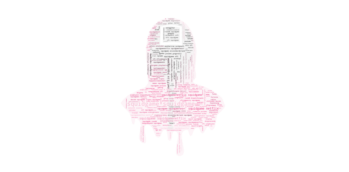

In [10]:
IMAGE_DIR = "./img"

from PIL import Image
stopwords = set(STOPWORDS)

mask = np.array(Image.open(f"{IMAGE_DIR}/squid_mask.png"))

image_colors = ImageColorGenerator(mask)
wordcloud = WordCloud(width = 3000, height = 2000, stopwords=STOPWORDS, background_color="white", max_words=1000, mask=mask).generate(' '.join(data.hashtags))

# create word cloud image
plt.figure()
plt.axis("off")
im2 = plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
im1 = plt.imshow(mask, alpha = 0.05)

# store to file
plt.savefig(f"{IMAGE_DIR}/squid_hash_wc.png", dpi=300)
plt.show()